#### Autoregressive Integrated Moving Averages


The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [70]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [71]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [72]:
df.shape

(107, 2)

In [73]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [74]:
df = df.dropna()

In [75]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [76]:
df['Month'] = pd.to_datetime(df['Month'])

In [77]:
df.set_index('Month', inplace = True)

In [78]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

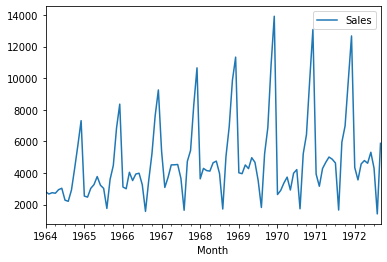

In [79]:
df.plot() # Data is seasonal  at some point it is increasing and at some point it is decreasing
# It helps to check data is stationary or not. If it is not stationary we need to convert into stationary

In [80]:
# Testing Stationarity

from statsmodels.tsa.stattools import adfuller

In [81]:
test_result = adfuller(df['Sales'])

In [82]:
test_result # It gives 4 different types of values i.e labels in below row

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [83]:
# Ho : It is not stationary
# H1 : It is stationary

# If it is non stationary we need to convert into stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations used']
    
    for value,label in zip(result,labels):
        print(label + ' : '+ str(value))
    if result[1] <= 0.05:
        print('Reject HO')
    else:
        print('Accept H1')

In [84]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations used : 93
Accept H1


Data points are often non-stationary or have means, variances, and covariances that change over time. 
Non-stationary behaviors can be trends, cycles, random walks, or combinations of the three. 
Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted.

#### Differencing

In [85]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12) # Yearly difference
# A “lag” is a fixed amount of passing time; One set of observations in a time series is plotted (lagged)
#against a second, later set of data.

In [86]:
df.head()

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN


In [87]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations used : 92
Reject HO


<AxesSubplot:xlabel='Month'>

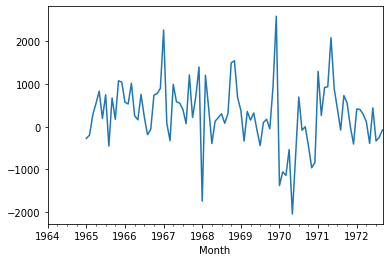

In [88]:
df['Seasonal First Difference'].plot() # We need to stop once data becomes Stationary

#### Auto Regressive Model

### Final Thoughts on Autocorrelation and Partial Autocorrelation

Arima has 3 different Models: AR, Differencing, MA

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.
    The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.
    Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.
    By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.
    A clearer pattern for an MA model is in the ACF.
    The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    
    p AR model lags
    
    d differencing
    
    q MA lags

In [89]:
from pandas.plotting import autocorrelation_plot

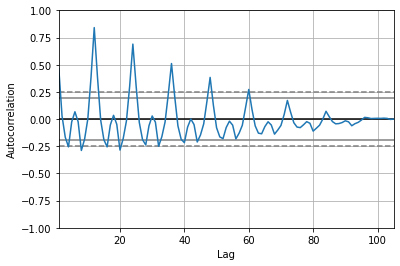

In [49]:
autocorrelation_plot(df['Sales'])
plt.show()

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

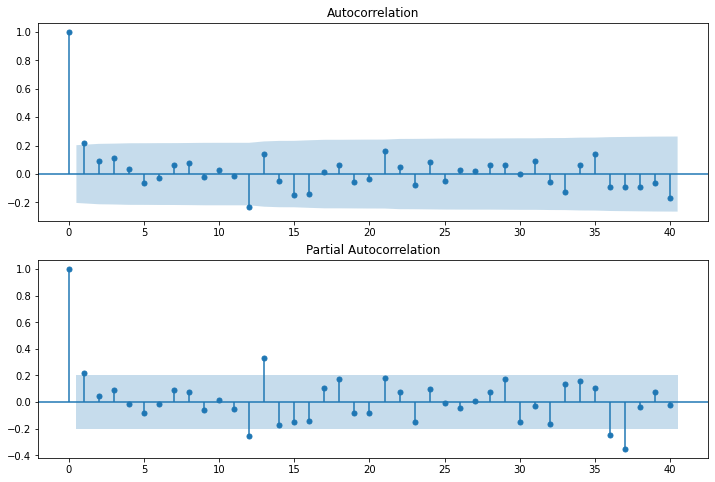

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

#### Example for NON SEASONAL DATA

In [57]:
#p=1, d=1, q=0 or 1 
# q is based on the shutsoff
# d is no of times we are tring to make stationary
from statsmodels.tsa.arima_model import ARIMA

In [58]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so 

In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 30 Aug 2021   AIC                           1910.251
Time:                        17:19:37   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

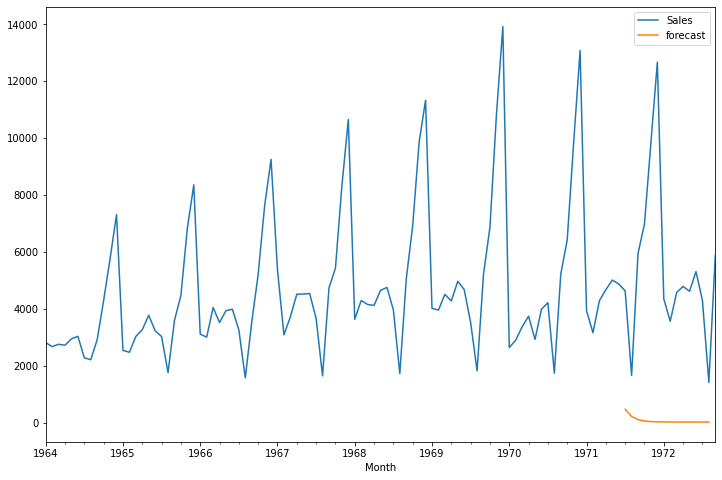

In [61]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

#### Using Sarimax for the seasonal data

In [62]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\USER\.conda\envs\virtualenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

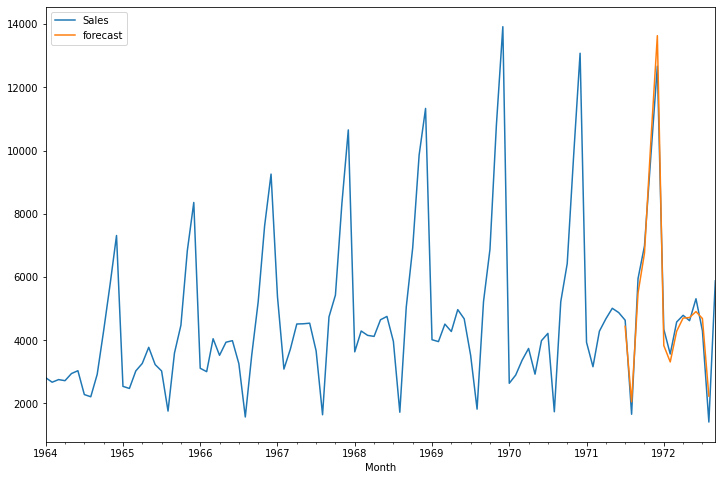

In [63]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

#### Predicting future sales for next 24 months

In [64]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [65]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [66]:
future_datest_df.tail()

,Sales,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [67]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

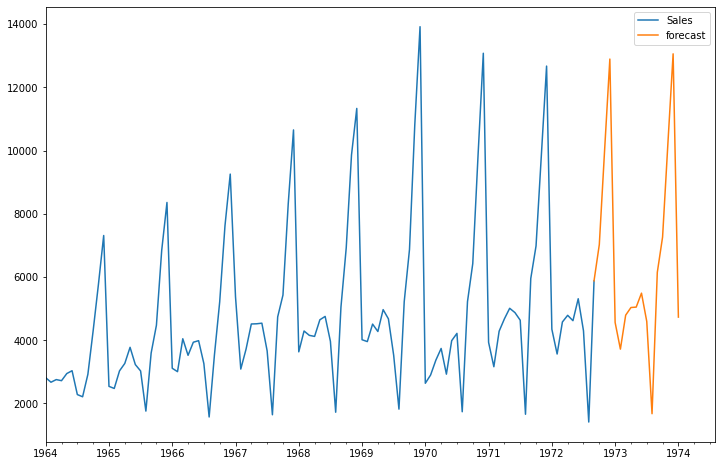

In [68]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 